#### Hover: 마우스 올리고 고정하기
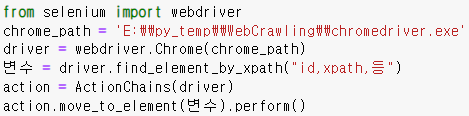
- 요즘에는 모바일과 같이 사용하기 때문에 hover 없이 한번에 클릭 가능한 경우도 있다.

#### 쿠키 지우기
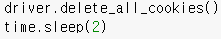
- Access Denied 메시지가 나오면 아래코드로 쿠키를 삭제한다.
- 쿠키: 해당 사이트 내의 사용자의 발자취
- 이를 지우지 않으면 크롤링 시 차단(block)될 수 있다.

#### 스크롤 다운하기
1. scroll_down(driver)
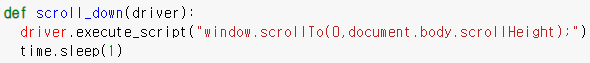
- 기존에는 scroll_down을 많이 했다.
- 이는 자동적으로 컴퓨터가 바로 아래로 이동한 것이기 때문에 자동화인 것이 감지될 수 있다.
- 자동화 감지되면 ERROR가 발생할 수 있다.

2. pyautogui.scroll(숫자)
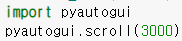
- GUI(Graphical User Interface): 사용자가 편리하게 사용할 수 있도록 입출력 등의 기능을 알기 쉬운 아이콘 따위의 그래픽으로 나타낸 것이다. 즉, 원래 컴퓨터는 0과 1 혹은 글자로만 이루어져 있는데 이를 사용하기 편리하게 그래픽화하여 바꾼 것이다.
- pyautogui 모듈은 사용자가 직접 움직이는 것처럼 보이기 때문에 수동적으로 사용되는 것으로 감지된다.
- 위 숫자 단위는 비트(bit)이다.

#### 이미지를 엑셀에 삽입하기
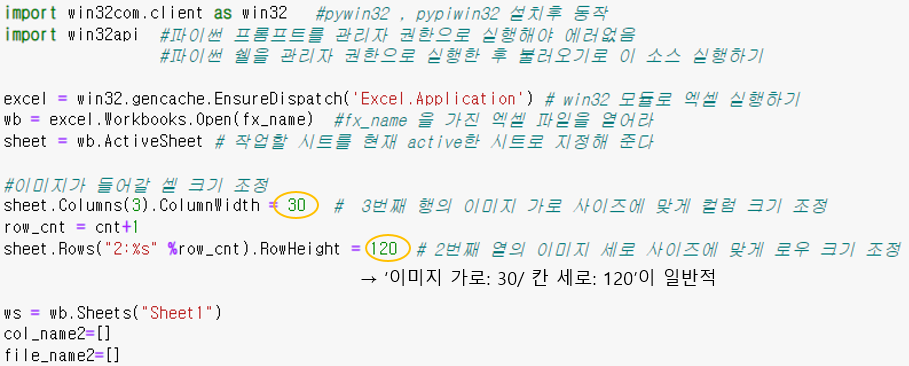
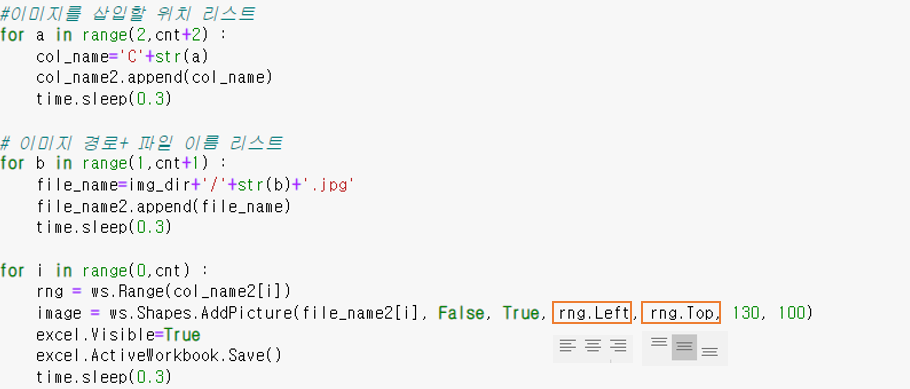
- win32: 윈도우 32비트에서 행하는 행동을 파이썬에서 실행할 것임을 지정

실습) 쿠팡에서 수집하고 싶은 카테고리를 입력한 후 이를 수집해라.

In [11]:
# 모든 모듈 열기
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
import time
import math
import os
import random
import pandas as pd
import pyautogui
import numpy as np
import urllib
import urllib.request
import ssl

# 제목
print("쿠팡 사이트에서 베스트 셀러 상품 수집하기")

# 입력 받기
what_kind = int(input("""
                     1.패션의류/잡화-여성    2.패션의류/잡화-남성   3.뷰티              4.출산/유아동
                     5.식품                  6.주방용품             7.생활용품          8.홈인테리어
                     9.가전/디지털          10.스포츠/레저         11.자동차용품       12.도서/음반/DVD
                    13.완구/취미            14.문구/오피스         15.반려동물용품     16.헬스/건강식품
                    
1. 자료 수집할 카테고리 번호를 쓰세요. """))
cnt = int(input("2. 몇 개의 자료를 수집하시겠습니까? "))

# 카테고리 이름 지정하기
if what_kind == 1:
    what_name = "패션의류/잡화-여성"
elif what_kind == 2:
    what_name = '패션의류/잡화-남성'
elif what_kind == 3:
    what_name = '뷰티'
elif what_kind == 4:
    what_name = '출산/유아동'
elif what_kind == 5:
    what_name = '식품'
elif what_kind == 6:
    what_name = '주방용품'
elif what_kind == 7:
    what_name = '생활용품'
elif what_kind == 8:
    what_name = '홈인테리어'
elif what_kind == 9:
    what_name = '가전/디지털'
elif what_kind == 10:
    what_name = '스포츠/레저'
elif what_kind == 11:
    what_name = '자동차용품'
elif what_kind == 12:
    what_name = '도서/음반/DVD'
elif what_kind == 13:
    what_name = '완구/취미'
elif what_kind == 14:
    what_name = '문구/오피스'
elif what_kind == 15:
    what_name = '반려동물용품'
else:
    what_name = '헬스/건강식품'

# 쿠팡 창 열기
from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'https://www.coupang.com/'
driver.get(url)
driver.maximize_window()
import time
time.sleep(3)

# 쿠키 삭제하기
driver.delete_all_cookies()
time.sleep(2)

# 입력받은 카테고리로 들어가기
# 카테고리에 마우스 올리기
category = driver.find_element_by_xpath('//*[@id="header"]/div')
action = ActionChains(driver)
action.move_to_element(category).perform()
time.sleep(1)
# 입력받은 카테고리 들어가기
if what_kind == 1 or what_kind == 2:
    category2 = driver.find_element_by_xpath('//*[@id="gnbAnalytics"]/ul[1]/li[1]')
    action.move_to_element(category2).perform()
    time.sleep(1)
    put1 = driver.find_element_by_xpath('//*[@id="gnbAnalytics"]/ul[1]/li[1]/div/div/ul/li[%s]' %what_kind)
    put1.click()
else:
    put2 = driver.find_element_by_xpath('//*[@id="gnbAnalytics"]/ul[1]/li[%s]' %(what_kind-1))
    put2.click()
time.sleep(3)

# 스크럴 다운하기
pyautogui.scroll(3000)
time.sleep(3)

# 파일 생성 및 저장할 위치 지정하기
folder_path = 'E:\\py_temp\\WebCrawling\\%s' %("쿠팡"+"_"+what_name) # 저장 폴더
if not os.path.isdir(folder_path):     #없으면 파일 새로 생성
    os.makedirs(folder_path)
os.chdir(folder_path)

# 이미지 파일 생성 및 저장할 위치 지정하기
img_folder_path = folder_path+'\\image' # 이미지 저장 폴더

# 현재 시간 및 이름 지정하기
# 현재시간
now = time.localtime()
s = '%04d-%02d-%02d-%02d-%02d-%02d' % (now.tm_year, now.tm_mon, now.tm_mday, now.tm_hour, now.tm_min, now.tm_sec)
# 이름 지정
text_name = "쿠팡"+"_"+what_name+"_"+"베스트셀러"+"_"+s+".txt"
xlsx_name = "쿠팡"+"_"+what_name+"_"+"베스트셀러"+"_"+s+".xlsx"
csv_name = "쿠팡"+"_"+what_name+"_"+"베스트셀러"+"_"+s+".csv"

쿠팡 사이트에서 베스트 셀러 상품 수집하기

                     1.패션의류/잡화-여성    2.패션의류/잡화-남성   3.뷰티              4.출산/유아동
                     5.식품                  6.주방용품             7.생활용품          8.홈인테리어
                     9.가전/디지털          10.스포츠/레저         11.자동차용품       12.도서/음반/DVD
                    13.완구/취미            14.문구/오피스         15.반려동물용품     16.헬스/건강식품
                    
1. 자료 수집할 카테고리 번호를 쓰세요. 3
2. 몇 개의 자료를 수집하시겠습니까? 129


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_5756/320784428.py:66: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_5756/320784428.py:79: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  category = driver.find_element_by_xpath('//*[@id="header"]/div')
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_5756/320784428.py:91: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  put2 = driver.find_element_by_xpath('//*[@id="gnbAnalytics"]/ul[1]/li[%s]' %(what_kind-1))


In [12]:
# 상세페이지 5개 각각 들어가기
full_html = driver.page_source
soup = BeautifulSoup(full_html,'html.parser')
content_list = soup.find('ul','baby-product-list').find_all('li')
for i in range(0,5):
    pro_name = content_list[i].find('div','name').get_text()
    print(pro_name)
    time.sleep(0.5)
    click_name = driver.find_element_by_link_text(pro_name)
    click_name.click()
    time.sleep(0.5)


    센카 퍼펙트 휩 페이셜 워시 클렌징 폼 120g 2개 + 15g 1개, 255g, 1세트



C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_5756/2094374332.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  click_name = driver.find_element_by_link_text(pro_name)


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"link text","selector":"
    센카 퍼펙트 휩 페이셜 워시 클렌징 폼 120g 2개 + 15g 1개, 255g, 1세트
"}
  (Session info: chrome=96.0.4664.45)
Stacktrace:
Backtrace:
	Ordinal0 [0x00726903+2517251]
	Ordinal0 [0x006BF8E1+2095329]
	Ordinal0 [0x005C2848+1058888]
	Ordinal0 [0x005ED448+1233992]
	Ordinal0 [0x005ED63B+1234491]
	Ordinal0 [0x00617812+1406994]
	Ordinal0 [0x0060650A+1336586]
	Ordinal0 [0x00615BBF+1399743]
	Ordinal0 [0x0060639B+1336219]
	Ordinal0 [0x005E27A7+1189799]
	Ordinal0 [0x005E3609+1193481]
	GetHandleVerifier [0x008B5904+1577972]
	GetHandleVerifier [0x00960B97+2279047]
	GetHandleVerifier [0x007B6D09+534521]
	GetHandleVerifier [0x007B5DB9+530601]
	Ordinal0 [0x006C4FF9+2117625]
	Ordinal0 [0x006C98A8+2136232]
	Ordinal0 [0x006C99E2+2136546]
	Ordinal0 [0x006D3541+2176321]
	BaseThreadInitThunk [0x778FFA29+25]
	RtlGetAppContainerNamedObjectPath [0x77CD7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77CD7A6E+238]


In [9]:
# 
if cnt > 30:
    print("요청하신 자료의 수가 많아 시간이 조금 지체될 수 있으니 기다려주세요~")
else:
    print("요청하신 자료 수집 중입니다. 잠시만 기다려주세요~")
    
# 리스트 만들기
rank = [] # 순위
img_ = [] # 제품 이미지
prod_name = [] #제품이름
no_prod = [] #품절여부
ori_cost = [] #원가
sale_cost = [] #할인가
sale = [] #할인율
rocket = [] #로켓배송여부
pre_date = [] #도착예정일
star = [] #평점
num_peo = [] #상품평수

num = 1
count = 1

# 이미 긁어오기
def f_img():
    global num
    count2 = 1
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    img_src = soup.find('ul','baby-product-list')
    img_src = img_src.find_all('dt','image')
    img_src2 = []
    for m in range(0,len(img_src)):
        img_src2.append(img_src[m].find('img'))
    for r in img_src2:
        img_.append('https:'+r['src'])
        count2 += 1

# 상품 긁어오기
f = open(text_name,'a',encoding='UTF-8')
def get():
    os.chdir(folder_path)
    
    f.write("-----------------------------------------------------------------"+"\n"+"\n")
    print("-" *70)
    print()
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    content_list = soup.find('ul',id="productList").find_all('li')
    
    each_prod = content_list[x]
                         
    rank.append(count)
    print("1. 판매순위:",count)
    f.write("1. 판매순위: %s \n" %count)

    try:
        name = each_prod.find('div','name').text.strip()
        prod_name.append(name)
    except:
        prod_name.append("제품이름 없음")
        print("2. 제품이름: 제품이름 없음")
        f.write("2. 제품이름: 제품이름 없음 \n")
    else:
        print("2. 제품이름:",name)
        f.write("2. 제품이름: %s \n" %name)

    try:
        prod = each_prod.find('div','out-of-stock').text.strip()
        no_prod.append(prod)
    except:
        no_prod.append("-")
        print("3. 품절여부: -")
        f.write("3. 품절여부: - \n")
    else:
        print("3. 품절여부:",prod)
        f.write("3. 품절여부: %s \n" %prod)
                         
    try:
        o_cost = each_prod.find('del','base-price').text.strip()
        ori_cost.append(o_cost)
    except:
        ori_cost.append("-")
        print("4. 제품정가: -")
        f.write("4. 제품정가: - \n")
    else:
        print("4. 제품정가:",o_cost)
        f.write("4. 제품정가: %s \n" %o_cost)
                         
    try:
        s_cost = each_prod.find('strong','price-value').text.strip()
        sale_cost.append(s_cost)
    except:
        sale_cost.append("-")
        print("5. 제품할인가: -")
        f.write("5. 제품할인가: - \n")
    else:
        print("5. 제품할인가:",s_cost)
        f.write("5. 제품할인가: %s \n" %s_cost)
                         
    try:
        discount = each_prod.find('span','discount-percentage').text.strip()
        sale.append(discount)
    except:
        sale.append("-")
        print("6. 할인율: -")
        f.write("6. 할인율: - \n")
    else:
        print("6. 할인율:",discount)
        f.write("6. 할인율: %s \n" %discount)
                         
    try:
        badge = each_prod.find('span','badge rocket').text.strip()
        rocket.append("가능 %s" %badge)
    except:
        rocket.append("-")
        print("7. 로켓배송여부: 불가능")
        f.write("7. 로켓배송여부: 불가능 \n")
    else:
        print("7. 로켓배송여부: 가능",badge)
        f.write("7. 로켓배송여부: 가능 %s \n" %badge)
                         
    try:
        date = each_prod.find('span','arrival-info emphasis').find('em').text.strip()
        pre_date.append(date)
    except:
        pre_date.append("-")
        print("8. 도착예정일: -")
        f.write("8. 도착예정일: - \n")
    else:
        print("8. 도착예정일:",date)
        f.write("8. 도착예정일: %s \n" %date)
                         
    try:
        star_rate = each_prod.find('em','rating').text.strip()
        star.append(star_rate+"/5")
    except:
        star.append("-")
        print("9. 상품평점: -")
        f.write("9. 상품평점: - \n")
    else:
        print("9. 상품평점:",star_rate+"/5")
        f.write("9. 상품평점: %s/5 \n" %star_rate)
                         
    try:
        peo = each_prod.find('span','rating-total-count').text.strip()
        num_peo.append(peo)
    except:
        num_peo.append("-")
        print("10. 상품평수: -")
        f.write("10. 상품평수: - \n")
    else:
        print("10. 상품평수:",peo)
        f.write("10. 상품평수: %s \n" %peo)
    print()
    print('-'*70)
    f.write("\n")

                         

# for loop을 이용하여 상품 긁어오기 실행
cnt_page = int(np.ceil(cnt/60))
cnt_last = int(cnt-(cnt_page-1)*60)

f = open(text_name,'a',encoding='UTF-8')
for i in range(1,cnt_page+1):
    driver.delete_all_cookies()
    time.sleep(5)
    page = driver.find_element_by_link_text('%s' %i)
    time.sleep(0.5)
    page.click()
    time.sleep(5)
    pyautogui.scroll(4000)
    time.sleep(2)
    print("%s 페이지 추출을 시작합니다." %i)
    if i == cnt_page:
        f_img()
        for x in range(0,cnt_last):
            get()
            count += 1
    else:
        f_img()
        for x in range(0,60):
            get()
            count += 1
            
# 이미지 저장하기
os.chdir(img_folder_path)
for k in range(0,len(img_)):
    urllib.request.urlretrieve(img_[k],str(num)+'.jpg')
    num += 1
            
f.close()
time.sleep(0.5)

요청하신 자료의 수가 많아 시간이 조금 지체될 수 있으니 기다려주세요~


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_5756/1476218234.py:168: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  page = driver.find_element_by_link_text('%s' %i)


1 페이지 추출을 시작합니다.
----------------------------------------------------------------------

1. 판매순위: 1
2. 제품이름: 센카 퍼펙트 휩 페이셜 워시 클렌징 폼 120g 2개 + 15g 1개, 255g, 1세트
3. 품절여부: -
4. 제품정가: 21,000
5. 제품할인가: 19,600
6. 할인율: 6%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 5.0/5
10. 상품평수: (2539)

----------------------------------------------------------------------
----------------------------------------------------------------------

1. 판매순위: 2
2. 제품이름: 이니스프리 화산송이모공폼 대용량, 300g, 1개
3. 품절여부: -
4. 제품정가: 12,000
5. 제품할인가: 6,720
6. 할인율: 43%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 5.0/5
10. 상품평수: (12580)

----------------------------------------------------------------------
----------------------------------------------------------------------

1. 판매순위: 3
2. 제품이름: 폴메디슨 시그니처 대용량 퍼퓸 바디워시 화이트머스크향, 2개, 1077ml
3. 품절여부: -
4. 제품정가: 59,600
5. 제품할인가: 16,620
6. 할인율: 72%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 4.5/5
10. 상품평수: (16885)

-------------------------------------------------------------------

1. 판매순위: 27
2. 제품이름: 미쟝센 퍼펙트 세럼 오리지널 샴푸 허브향, 680ml, 4개
3. 품절여부: -
4. 제품정가: 52,000
5. 제품할인가: 13,060
6. 할인율: 74%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 4.5/5
10. 상품평수: (21428)

----------------------------------------------------------------------
----------------------------------------------------------------------

1. 판매순위: 28
2. 제품이름: 메디힐 더블 카밍 워터 마스크 10p +히알루 모이스트 에센스 마스크 10p +펩타 리프팅 앰플 마스크 10p, 1세트
3. 품절여부: -
4. 제품정가: 45,000
5. 제품할인가: 18,900
6. 할인율: 58%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 5.0/5
10. 상품평수: (2852)

----------------------------------------------------------------------
----------------------------------------------------------------------

1. 판매순위: 29
2. 제품이름: 록키스 티트리 필링젤, 120ml, 1개
3. 품절여부: -
4. 제품정가: 11,000
5. 제품할인가: 6,790
6. 할인율: 38%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 4.5/5
10. 상품평수: (31001)

----------------------------------------------------------------------
----------------------------------------------------------------------

1. 판매

1. 판매순위: 53
2. 제품이름: 달바 화이트 트러플 퍼스트 스프레이 세럼 100ml 2개 + 약산성 젤 클렌저 15ml, 1세트
3. 품절여부: -
4. 제품정가: 58,000
5. 제품할인가: 27,000
6. 할인율: 53%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 5.0/5
10. 상품평수: (304)

----------------------------------------------------------------------
----------------------------------------------------------------------

1. 판매순위: 54
2. 제품이름: 쿤달 허니 앤 마카다미아 네이처 샴푸 베이비파우더향, 1058ml, 1개
3. 품절여부: -
4. 제품정가: 18,900
5. 제품할인가: 14,900
6. 할인율: 21%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 4.5/5
10. 상품평수: (57503)

----------------------------------------------------------------------
----------------------------------------------------------------------

1. 판매순위: 55
2. 제품이름: 나드 바디로션 라벤더머스크, 1000ml, 1개
3. 품절여부: -
4. 제품정가: 23,000
5. 제품할인가: 11,900
6. 할인율: 48%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 4.5/5
10. 상품평수: (5330)

----------------------------------------------------------------------
----------------------------------------------------------------------

1. 판매순위:

1. 판매순위: 79
2. 제품이름: 케라시스 고밀착 오일 염색제, 다크브라운, 1개
3. 품절여부: -
4. 제품정가: 19,900
5. 제품할인가: 10,240
6. 할인율: 48%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 4.5/5
10. 상품평수: (3196)

----------------------------------------------------------------------
----------------------------------------------------------------------

1. 판매순위: 80
2. 제품이름: 밀크바오밥 바디로션 화이트 머스크향, 500ml, 2개
3. 품절여부: -
4. 제품정가: 23,600
5. 제품할인가: 16,720
6. 할인율: 29%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 4.5/5
10. 상품평수: (9266)

----------------------------------------------------------------------
----------------------------------------------------------------------

1. 판매순위: 81
2. 제품이름: 토니모리 원더 세라마이드 모찌 토너, 500ml, 1개
3. 품절여부: -
4. 제품정가: 11,900
5. 제품할인가: 9,550
6. 할인율: 19%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 4.5/5
10. 상품평수: (15097)

----------------------------------------------------------------------
----------------------------------------------------------------------

1. 판매순위: 82
2. 제품이름: 데저트에센스 100% 퓨어 호호바오일

1. 판매순위: 105
2. 제품이름: 쿤달 퓨어 바디워시 베이비파우더향, 1058ml, 2개
3. 품절여부: -
4. 제품정가: 37,800
5. 제품할인가: 20,480
6. 할인율: 45%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 4.5/5
10. 상품평수: (36353)

----------------------------------------------------------------------
----------------------------------------------------------------------

1. 판매순위: 106
2. 제품이름: 마녀공장 퓨어 클렌징 오일, 250ml, 1개
3. 품절여부: -
4. 제품정가: 34,000
5. 제품할인가: 14,990
6. 할인율: 55%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 4.5/5
10. 상품평수: (4837)

----------------------------------------------------------------------
----------------------------------------------------------------------

1. 판매순위: 107
2. 제품이름: 닥터지 그린 마일드 업 선 플러스 SPF50+ PA++++, 35ml, 1개
3. 품절여부: -
4. 제품정가: 22,000
5. 제품할인가: 12,900
6. 할인율: 41%
7. 로켓배송여부: 가능 
8. 도착예정일: 내일(화) 11/30
9. 상품평점: 4.5/5
10. 상품평수: (9036)

----------------------------------------------------------------------
----------------------------------------------------------------------

1. 판매순위: 108
2. 제품이름: 여우화장

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"link text","selector":"3"}
  (Session info: chrome=96.0.4664.45)
Stacktrace:
Backtrace:
	Ordinal0 [0x00726903+2517251]
	Ordinal0 [0x006BF8E1+2095329]
	Ordinal0 [0x005C2848+1058888]
	Ordinal0 [0x005ED448+1233992]
	Ordinal0 [0x005ED63B+1234491]
	Ordinal0 [0x00617812+1406994]
	Ordinal0 [0x0060650A+1336586]
	Ordinal0 [0x00615BBF+1399743]
	Ordinal0 [0x0060639B+1336219]
	Ordinal0 [0x005E27A7+1189799]
	Ordinal0 [0x005E3609+1193481]
	GetHandleVerifier [0x008B5904+1577972]
	GetHandleVerifier [0x00960B97+2279047]
	GetHandleVerifier [0x007B6D09+534521]
	GetHandleVerifier [0x007B5DB9+530601]
	Ordinal0 [0x006C4FF9+2117625]
	Ordinal0 [0x006C98A8+2136232]
	Ordinal0 [0x006C99E2+2136546]
	Ordinal0 [0x006D3541+2176321]
	BaseThreadInitThunk [0x778FFA29+25]
	RtlGetAppContainerNamedObjectPath [0x77CD7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77CD7A6E+238]


In [102]:
os.chdir(folder_path)

# txt 파일에 크롤링 요약 정보 저장하기
import sys
orig_stdout = sys.stdout
f = open(text_name,'a',encoding='UTF-8')
sys.stdout = f
sys.stdout = orig_stdout
f.close( )

# 데이터 프레임 형태로 리스트 취합하기
pro = pd.DataFrame()
pro['판매순위']=pd.Series(rank)
pro['제품사진']=pd.Series(img_)
pro['제품이름']=pd.Series(prod_name)
pro['품절여부']=pd.Series(no_prod)
pro['제품정가']=pd.Series(ori_cost)
pro['제품할인가']=pd.Series(sale_cost)
pro['할인율']=pd.Series(sale)
pro['로켓배송여부']=pd.Series(rocket)
pro['도착예정일']=pd.Series(pre_date)
pro['상품평점']=pd.Series(star)
pro['상품평수']=pd.Series(num_peo)

# csv 형태로 저장하기
pro.to_csv(csv_name,encoding="utf-8-sig",index=False)

# 엑셀 형태로 저장하기
pro.to_excel(xlsx_name ,index=False)

#이미지 삽입하기
import win32com.client as win32
import win32api
excel = win32.gencache.EnsureDispatch('Excel.Application')
wb = excel.Workbooks.Open(xlsx_name)
sheet = wb.ActiveSheet

#이미지가 들어갈 셀 크기 조정
sheet.Columns(3).ColumnWidth = 30 
row_cnt = cnt+1
sheet.Rows("2:%s" %row_cnt).RowHeight = 120

ws = wb.Sheets("Sheet1")
col_name2=[]
file_name2=[]

#이미지를 삽입할 위치 리스트
for a in range(2,cnt+2) :
    col_name='B'+str(a)
    col_name2.append(col_name)
    time.sleep(0.3)

# 이미지 경로+ 파일 이름 리스트
for b in range(1,cnt+1) :
    file_name=img_folder_path+'/'+str(b)+'.jpg'
    file_name2.append(file_name)
    time.sleep(0.3)

for i in range(0,cnt) :
    rng = ws.Range(col_name2[i])
    image = ws.Shapes.AddPicture(file_name2[i], False, True, rng.Middle, rng.Middle, 130, 100)
    excel.Visible=True
    excel.ActiveWorkbook.Save()
    time.sleep(0.3)

com_error: (-2147352567, '예외가 발생했습니다.', (0, 'Microsoft Excel', "'쿠팡_뷰티_베스트셀러_2021-11-26-15-19-49.xlsx'을(를) 찾을 수 없습니다. 파일의 이름이 변경되었거나 파일이 이동 또는 삭제되지 않았는지 확인하세요.", 'xlmain11.chm', 0, -2146827284), None)